Documentation:
In this project,i have imported multiple packages for data manipulation,data processing,machine learning and more. The project is reading a csv file to perform certain operations. At first, i am giving information about the csv file then performing some statistical analysis on data. Then i am getting useful insights from data. Then visualizing the data to check the performance of company. Then performing machine learning algorithm on data to check the efficiency of program.   

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder,MinMaxScaler


In [2]:
df = pd.read_csv("stock.csv")

In [3]:
print(df.shape)
print(df.columns)

(1901, 7)
Index(['Company', 'Date', 'Price', 'Volume', 'Open', 'High', 'Low'], dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1901 entries, 0 to 1900
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  1901 non-null   object 
 1   Date     1868 non-null   object 
 2   Price    1890 non-null   object 
 3   Volume   1884 non-null   float64
 4   Open     1887 non-null   object 
 5   High     1889 non-null   object 
 6   Low      1892 non-null   object 
dtypes: float64(1), object(6)
memory usage: 104.1+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'],errors='coerce')
df.sort_values('Date', inplace=True)

In [6]:
print("Missing values before dropping:")
print(df.isnull().sum())

Missing values before dropping:
Company     0
Date       33
Price      11
Volume     17
Open       14
High       12
Low         9
dtype: int64


In [7]:
df.dropna(inplace=True)
print(df.shape)

(1806, 7)


In [8]:
print("\nMissing values after droping:")
print(df.isnull().sum())


Missing values after droping:
Company    0
Date       0
Price      0
Volume     0
Open       0
High       0
Low        0
dtype: int64


In [9]:
conversion = ['Price','Volume', 'Open', 'High', 'Low']
for column in conversion:
    df[column] = df[column].replace('[\$,]', '', regex=True).astype(float)

In [10]:
df.describe()

,Date,Price,Volume,Open,High,Low
count,1806,1806.000000,1.806000e+03,1806.000000,1806.000000,1806.00000
mean,2022-06-26 07:48:50.232557824,152.805842,4.288890e+07,152.600598,154.825233,150.63381
min,2013-07-18 00:00:00,15.090000,2.657898e+06,14.650000,15.330000,14.61000
25%,2022-06-14 06:00:00,97.657500,9.614756e+06,97.687500,98.565000,96.04250
50%,2023-01-01 00:00:00,136.045000,3.019912e+07,135.295000,138.160000,133.77000
75%,2023-03-23 00:00:00,177.807500,6.898622e+07,177.650000,179.625000,175.86500
max,2023-07-17 00:00:00,445.270000,2.475342e+08,446.150000,448.650000,439.50000
std,NaN,87.597652,3.675246e+07,87.475092,88.923657,86.22202


Biggest Volume Of Company

In [11]:
highest_volume_day = df[df['Volume'] == df['Volume'].max()]
print(highest_volume_day)

     Company       Date  Price       Volume  Open   High    Low
1018    MSFT 2013-07-19   31.4  247534200.0  32.4  32.67  31.02


Best Performance of Comapny in a Specific Day

In [12]:
best_company = df[df['Price'] == df['Price'].max()]['Company'].values[0]
best = df[df['Price'] == df['Price'].max()]
print("The best company is: ",best_company)
print(f'{best}')

The best company is:  NFLX
     Company       Date   Price     Volume   Open    High    Low
1775    NFLX 2023-06-15  445.27  7099915.0  444.1  448.65  439.5


Highest & Lowest of Price and Volume

In [13]:
Performance = ['Price', 'Volume', 'Open', 'High', 'Low']
for name in Performance:
    highest = df[df[name] == df[name].max()]['Company'].values[0]
    lowest = df[df[name] == df[name].min()]['Company'].values[0]
    print(f'\n{name}')
    print(f'Highest {name}: {highest}, Lowest {name}: {lowest}')


Price
Highest Price: NFLX, Lowest Price: TSLA

Volume
Highest Volume: MSFT, Lowest Volume: NFLX

Open
Highest Open: NFLX, Lowest Open: TSLA

High
Highest High: NFLX, Lowest High: TSLA

Low
Highest Low: NFLX, Lowest Low: TSLA


In [14]:
average_volume_company = df.groupby('Company')['Volume'].mean() 
print(average_volume_company)

Company
AAPL    8.046715e+07
AMD     7.098349e+07
AMZN    6.722693e+07
CSCO    1.837374e+07
META    3.580510e+07
MSFT    3.474986e+07
NFLX    6.723716e+06
QCOM    7.898772e+06
SBUX    7.874054e+06
TSLA    8.303026e+07
Name: Volume, dtype: float64


Data Normalization

In [15]:
a = MinMaxScaler()
df_normalized = df.copy()
df_normalized[conversion] = a.fit_transform(df[conversion])

df_normalized

,Company,Date,Price,Volume,Open,High,Low
1019,MSFT,2013-07-18,0.047306,0.187298,0.048830,0.047448,0.048507
1018,MSFT,2013-07-19,0.037914,1.000000,0.041136,0.040017,0.038622
1017,MSFT,2013-07-22,0.039332,0.311622,0.039513,0.038493,0.039987
1016,MSFT,2013-07-23,0.038891,0.257890,0.040000,0.038563,0.040246
1015,MSFT,2013-07-24,0.039216,0.204761,0.040301,0.038909,0.040669
...,...,...,...,...,...,...,...
775,MSFT,2023-07-14,0.767469,0.104930,0.771587,0.775639,0.775966
1,AAPL,2023-07-14,0.408201,0.159094,0.406906,0.405820,0.411918
1020,CSCO,2023-07-17,0.083035,0.055061,0.082387,0.082203,0.083622
774,MSFT,2023-07-17,0.768608,0.072306,0.767161,0.765393,0.771000


Comparison of Stock

In [16]:
aapl = 'AAPL'
df.loc[df['Company'] == aapl, 'Price Range'] = df.loc[df['Company'] == aapl, 'High'] - df.loc[df['Company'] == aapl, 'Low']
df.loc[df['Company'] == aapl, 'Difference of Price'] = df.loc[df['Company'] == aapl, 'Price'] - df.loc[df['Company'] == aapl, 'Open']

df_company = df[df['Company'] == aapl]
df_company.tail()

,Company,Date,Price,Volume,Open,High,Low,Price Range,Difference of Price
5,AAPL,2023-07-10,188.61,59922160.0,189.26,189.99,187.04,2.95,-0.65
3,AAPL,2023-07-12,189.77,60750250.0,189.68,191.70,188.47,3.23,0.09
2,AAPL,2023-07-13,190.54,41342340.0,190.50,191.19,189.78,1.41,0.04
1,AAPL,2023-07-14,190.69,41616240.0,190.23,191.18,189.63,1.55,0.46
0,AAPL,2023-07-17,193.99,50520160.0,191.90,194.32,191.81,2.51,2.09


Heatmap 

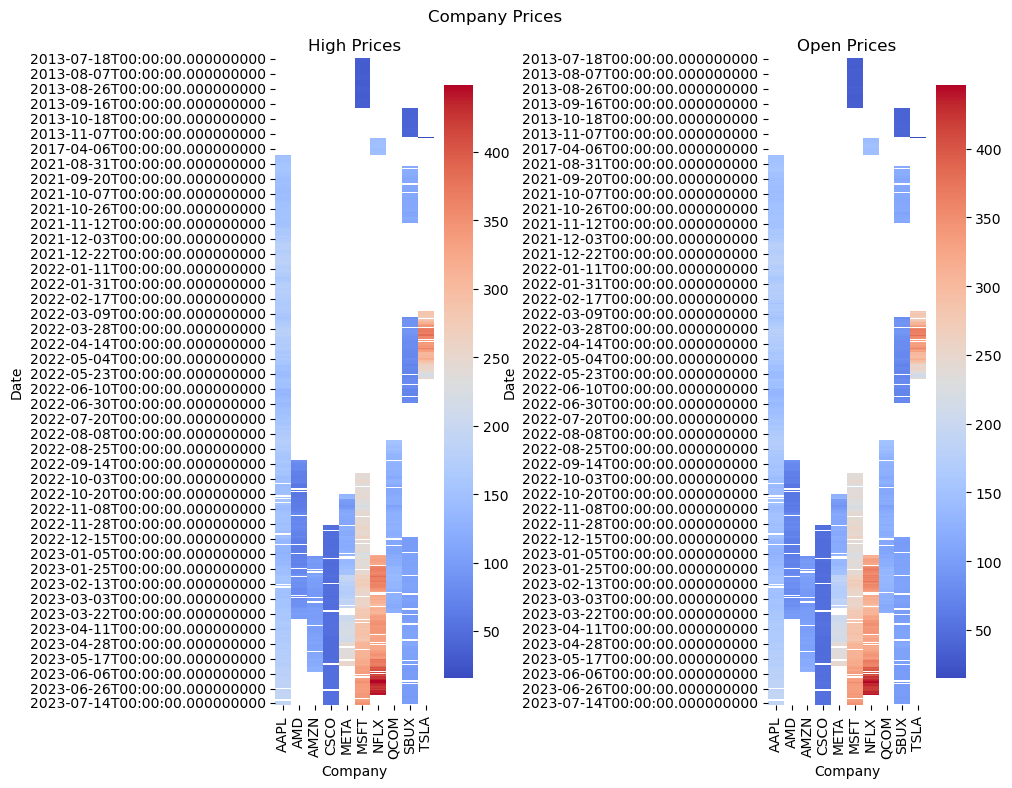

In [17]:
plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
sns.heatmap(df.pivot(index='Date',columns='Company',values='High'), cmap='coolwarm')
plt.title('High Prices')

plt.subplot(1,2,2)
sns.heatmap(df.pivot(index='Date',columns='Company',values='Open'), cmap='coolwarm')
plt.title('Open Prices')
plt.suptitle('Company Prices')
plt.tight_layout()
plt.show()


Volume Performance by Company

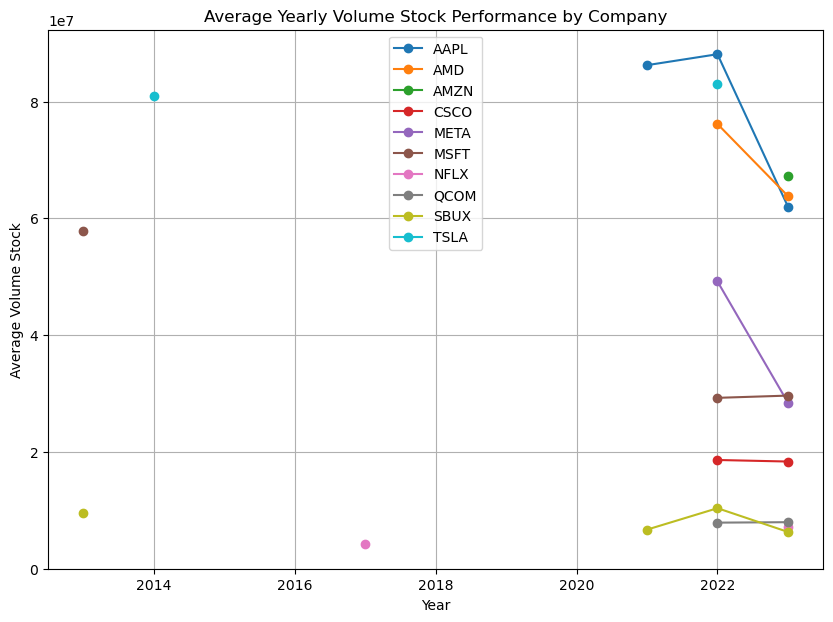

In [18]:
df['Year'] = df['Date'].dt.year

company_performance_year = df.groupby(['Company', 'Year'])['Volume'].mean().unstack()

plt.figure(figsize=(10, 7))
for company in company_performance_year.index:
    plt.plot(company_performance_year.columns, company_performance_year.loc[company, :], marker='o', label=company)

plt.title('Average Yearly Volume Stock Performance by Company')
plt.xlabel('Year')
plt.ylabel('Average Volume Stock')
plt.legend()
plt.grid(True)
plt.show()


Bar graph

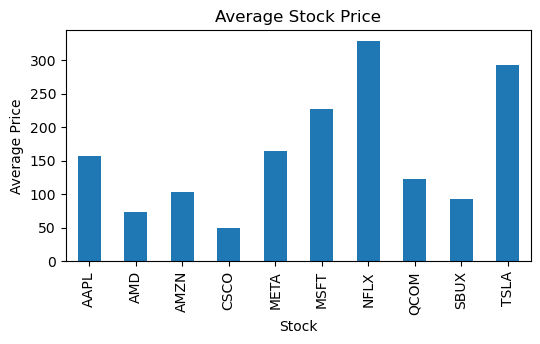

In [19]:
plt.figure(figsize=(6, 3))
df.groupby('Company')['Price'].mean().plot(kind='bar')
plt.title('Average Stock Price')
plt.xlabel('Stock')
plt.ylabel('Average Price')
plt.show()

Scatter plot

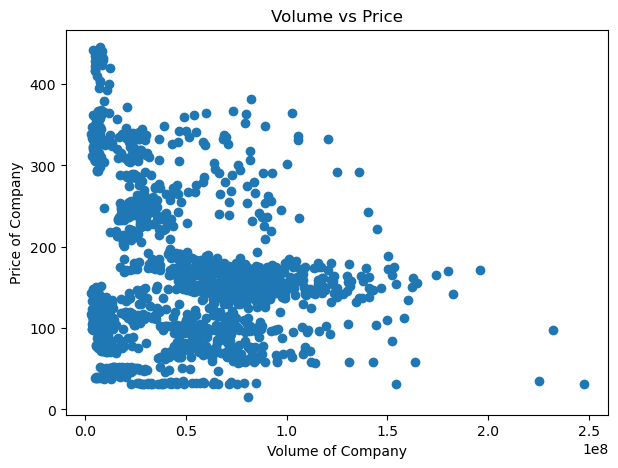

In [20]:
plt.figure(figsize=(7, 5))
plt.scatter(df['Volume'], df['Price'])
plt.title('Volume vs Price')
plt.xlabel('Volume of Company')
plt.ylabel('Price of Company')

plt.show()

Histogram

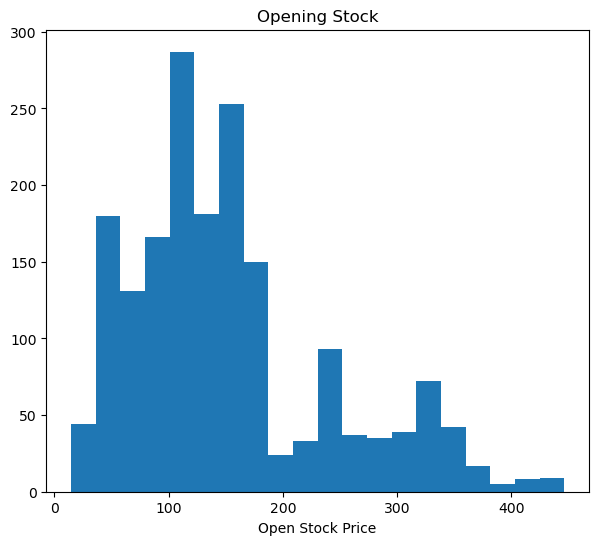

In [21]:
plt.figure(figsize=(7, 6))
plt.hist(df['Open'],bins=20)
plt.title('Opening Stock')
plt.xlabel('Open Stock Price')
plt.ylabel('')

plt.show()

Box plot

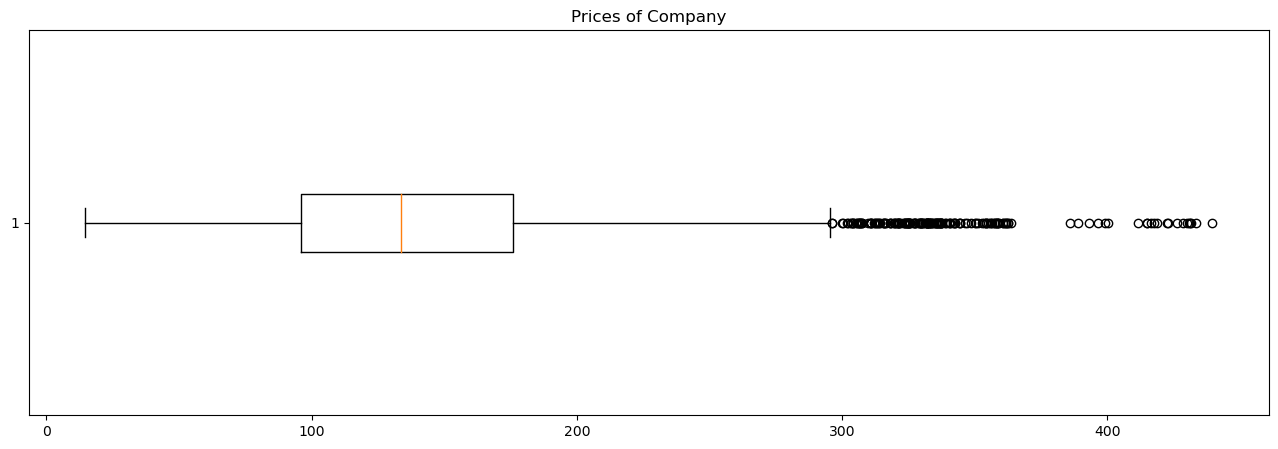

In [22]:
plt.figure(figsize=(16, 5))
plt.boxplot(df['Low'].dropna(), vert=False)
plt.title('Prices of Company')

plt.show()

Pie chart

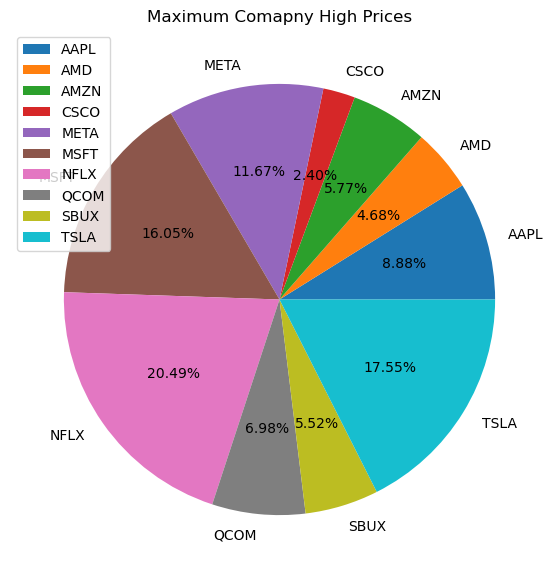

In [23]:
average = df.groupby('Company')['High'].max()
plt.figure(figsize=(15, 7))
plt.pie(average, labels=average.index,autopct='%1.2f%%')
plt.title('Maximum Comapny High Prices')
plt.legend()
plt.show()

Line Graph

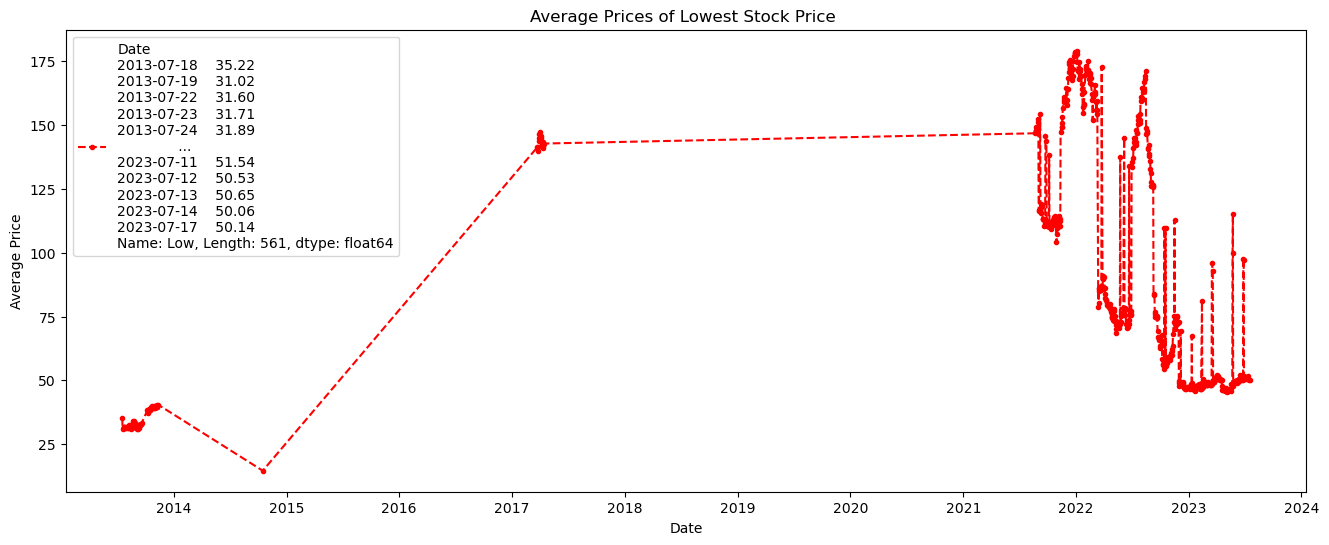

In [24]:
plt.figure(figsize=(16,6))
avg_wth_Time = df.groupby('Date')['Low'].min()

plt.plot(avg_wth_Time.index, avg_wth_Time, linestyle='--', marker = '.', color='r',label=avg_wth_Time)

plt.title('Average Prices of Lowest Stock Price ')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.show()

Area Graph

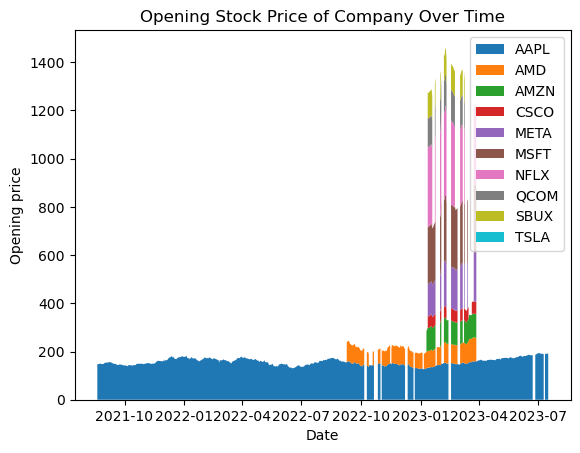

In [25]:
open_stock = df.pivot(index='Date', columns='Company', values='Open')

plt.stackplot(open_stock.index, open_stock.values.T, labels=open_stock.columns)

plt.title('Opening Stock Price of Company Over Time')
plt.xlabel('Date')
plt.ylabel('Opening price')

plt.legend()
plt.show()

Machine Learning

In [26]:
change_to_numeric = LabelEncoder()
df['Company'] =  change_to_numeric.fit_transform(df['Company'])

feature = df[['Open', 'High', 'Low', 'Volume']] 
target = df['Company']

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.3, random_state=42)

classify = DecisionTreeClassifier(random_state=42)
classify.fit(X_train, y_train)
y_pred = classify.predict(X_test)

In [27]:
ModelAccurate = accuracy_score(y_test, y_pred)
Modelprecision = precision_score(y_test, y_pred,average='weighted')
Modelrecall = recall_score(y_test, y_pred,average='weighted')
ModelF1 = f1_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)

In [28]:
print(f'Accuracy:{ModelAccurate}' )
print(f'Precision:{Modelprecision} ')
print(f'Recall:{Modelrecall}' )
print(f"F1 Score: {ModelF1}")
print(f"Confusion Matrix: \n{confusion}")

Accuracy:0.8948339483394834
Precision:0.8916407922305009 
Recall:0.8948339483394834
F1 Score: 0.8922323249497937
Confusion Matrix: 
[[140   0   0   0   2   0   0   0   0   0]
 [  0  37   2   0   1   0   0   0   1   0]
 [  1   6  27   0   3   0   0   0   0   0]
 [  0   0   0  40   0   0   0   1   0   0]
 [  9   0   3   0  20   1   0   0   1   1]
 [  0   0   0   0   3  51   3   0   0   1]
 [  0   0   0   0   0   2  41   1   0   0]
 [  0   0   0   0   1   0   1  30   7   0]
 [  0   0   0   0   0   0   0   4  82   0]
 [  0   0   0   0   0   2   0   0   0  17]]


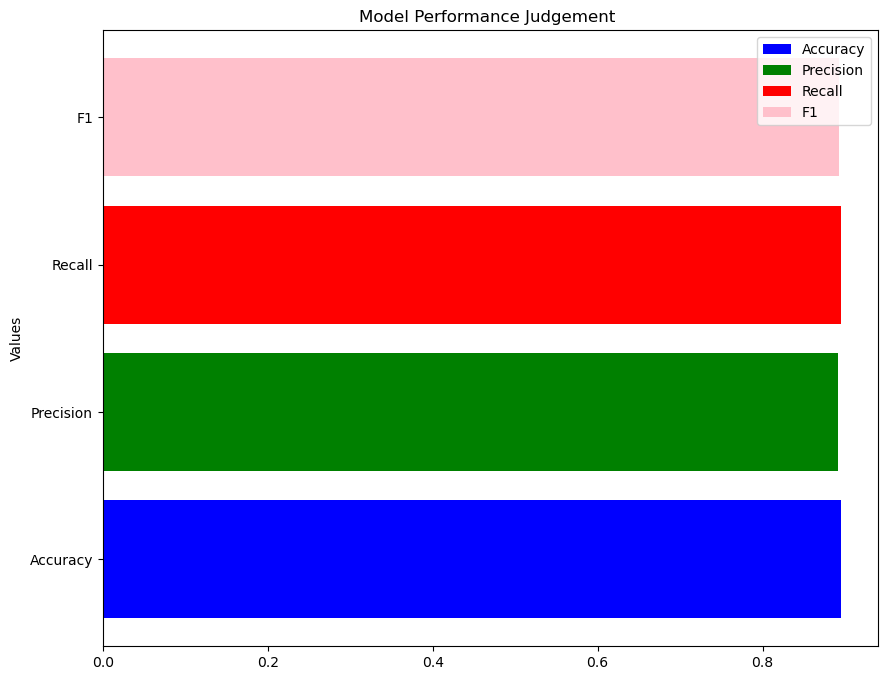

In [29]:
z = ['Accuracy', 'Precision', 'Recall','F1']
value = [ModelAccurate, Modelprecision, Modelrecall,ModelF1]

plt.figure(figsize=(10, 8))
plt.barh(z, value, color=['blue', 'green', 'red','pink'],label=z)
plt.ylabel('Values')
plt.title('Model Performance Judgement ')
plt.legend()
plt.show()